<a href="https://colab.research.google.com/github/arpitad001/Data-Analytics-lab/blob/main/lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

In [5]:
np.random.seed(42)

In [31]:
n = 500
data = pd.DataFrame({
    "CustomerID": range(1, n+1),
    "Gender": np.random.choice(["Male", "Female"], n),
    "Age": np.random.randint(18, 60, n),
    "Income": np.random.normal(55000, 12000, n).round(2),
    "SpendingScore": np.random.normal(60, 15, n).round(2),
    "Location": np.random.choice(["Urban", "Rural"], n, p=[0.7, 0.3]),
    "Category": np.random.choice(["Electronics", "Fashion", "Groceries"], n)
})

In [32]:
data.head()

,CustomerID,Gender,Age,Income,SpendingScore,Location,Category
0,1,Female,28,80324.11,79.73,Urban,Fashion
1,2,Male,37,47502.27,51.46,Urban,Groceries
2,3,Male,28,72281.32,66.04,Urban,Electronics
3,4,Female,32,59229.07,58.94,Urban,Fashion
4,5,Female,34,47067.74,66.40,Urban,Electronics


In [8]:
print(data.describe())

       CustomerID         Age        Income  SpendingScore
count  500.000000  500.000000    500.000000      500.00000
mean   250.500000   38.590000  54618.946660       59.98748
std    144.481833   11.819022  12056.189355       14.70606
min      1.000000   18.000000  13230.290000       16.68000
25%    125.750000   29.000000  46784.635000       49.43000
50%    250.500000   39.500000  54910.410000       60.54000
75%    375.250000   49.000000  62596.277500       69.55500
max    500.000000   59.000000  88405.330000      104.48000


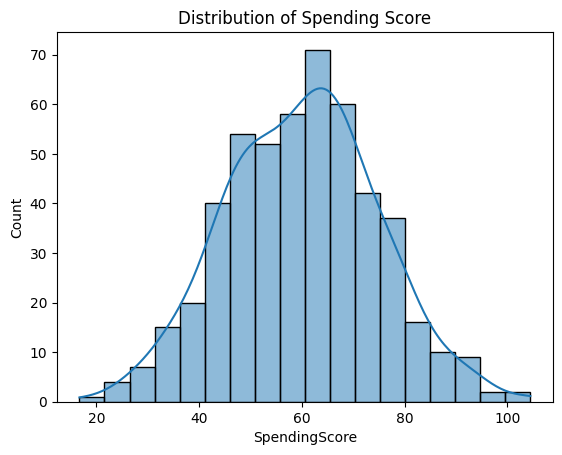

In [9]:
sns.histplot(data['SpendingScore'], kde=True)
plt.title("Distribution of Spending Score")
plt.show()

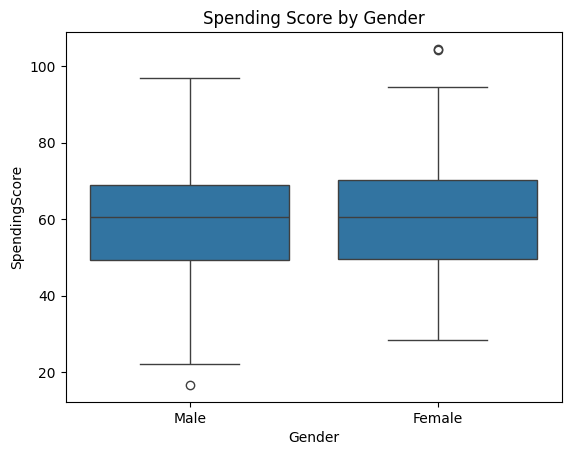

In [10]:
sns.boxplot(x='Gender', y='SpendingScore', data=data)
plt.title("Spending Score by Gender")
plt.show()


In [11]:
 # Hypotheses:
# H0: μ = 60
# H1: μ ≠ 60
sample_mean = data['SpendingScore'].mean()
pop_mean = 60

In [12]:
sample_std = data['SpendingScore'].std()
n = len(data)

In [13]:
z_stat = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))

In [14]:
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print(f"Z-statistic: {z_stat:.3f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0 → mean spending is significantly different from 60")
else:
    print("Fail to reject H0 → no significant difference from 60")

Z-statistic: -0.019, P-value: 0.9848
Fail to reject H0 → no significant difference from 60


In [15]:
male_scores = data[data['Gender'] == 'Male']['SpendingScore']
female_scores = data[data['Gender'] == 'Female']['SpendingScore']
t_stat, p_val = stats.ttest_ind(male_scores, female_scores)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Reject H0 → significant difference between genders")
else:
    print("Fail to reject H0 → no significant difference between genders")

T-statistic: -0.765, P-value: 0.4445
Fail to reject H0 → no significant difference between genders


In [16]:
contingency_table = pd.crosstab(data['Location'], data['Category'])
print(contingency_table)

Category  Electronics  Fashion  Groceries
Location                                 
Rural              48       42         49
Urban             133      109        119


In [17]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2: {chi2:.3f}, P-value: {p:.4f}")

Chi2: 0.304, P-value: 0.8589


In [18]:
if p < 0.05:
    print("Reject H0 → Location and Category are dependent")
else:
    print("Fail to reject H0 → Location and Category are independent")

Fail to reject H0 → Location and Category are independent


In [19]:
groups = [data[data['Category']==cat]['SpendingScore'] for cat in data['Category'].unique()]

In [20]:
f_stat, p_val = stats.f_oneway(*groups)

In [21]:
print(f"F-statistic: {f_stat:.3f}, P-value: {p_val:.4f}")

F-statistic: 0.570, P-value: 0.5657


In [22]:
if p_val < 0.05:
    print("Reject H0 → significant difference among categories")
else:
    print("Fail to reject H0 → no significant difference among categories")

Fail to reject H0 → no significant difference among categories


In [23]:
corr=data[['Age', 'Income', 'SpendingScore']].corr()

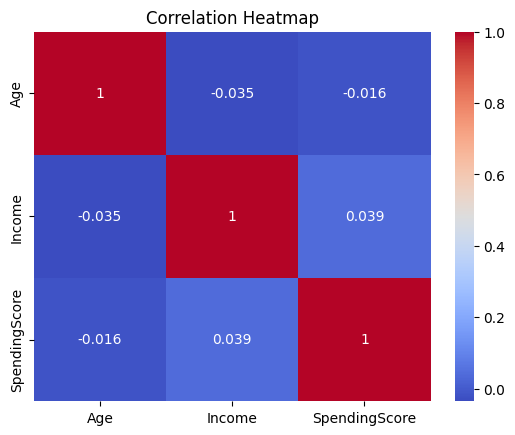

In [24]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()